## Задание 1. Old School Image Classification

Используя датасет «CIFAR-10» Обучить классические модели ML на классификацию изображений

Использовать любые 2  из предложенных способов извлечения признаков (можете использовать свои варианты, если они репрезентативны):
- Гистограммы яркостей
- HOG (opencv или skimage как вариант)
- Мешок визуальных слов

Задачи:
1) Обучить несколько моделей классификаторов (3 вида) из sklearn на выбранных признаках,
2) Отобразить качество моделей на тестовой выборке
3) Отобразить предсказание некоторый тестовых изображений


In [1]:
import pandas as pd
import numpy as np
import sklearn as skl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffl
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import tensorflow as tf
import cv2
import skimage

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train[:5000]
y_train = y_train[:5000]
x_test = x_test[:1000]
y_test = y_test[:1000]

In [3]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.30, random_state=42, stratify=y_train)

In [4]:
num_to_cl = {
    0 : 'airplane',
    1 : 'automobile',
    2 : 'bird',
    3 : 'cat',
    4 : 'deer',
    5 : 'dog',
    6 : 'frog',
    7 : 'horse',
    8 : 'ship',
    9 : 'truck',
}

In [5]:
from collections import Counter
print(Counter(y_train.flatten()))
print(Counter(y_test.flatten()))
print(Counter(y_val.flatten()))

Counter({8: 364, 6: 363, 2: 363, 4: 363, 0: 354, 9: 349, 5: 342, 3: 340, 7: 340, 1: 322})
Counter({6: 112, 9: 109, 8: 106, 3: 103, 0: 103, 7: 102, 2: 100, 4: 90, 1: 89, 5: 86})
Counter({8: 156, 4: 156, 6: 156, 2: 156, 0: 151, 9: 149, 7: 146, 5: 146, 3: 146, 1: 138})


#### Гистограмма яркостей

In [6]:
def extract_hist(images, df):
    for i, image in enumerate(images):
        df.loc[i] = cv2.calcHist([image], [0], None, [256], [0, 256]).reshape(-1)
    return df

In [7]:
hist_df_train = pd.DataFrame(columns=[f'count {pix}' for pix in range(0, 256)])
hist_df_test = pd.DataFrame(columns=[f'count {pix}' for pix in range(0, 256)])

In [8]:
hist_df_train = extract_hist(x_train, hist_df_train)
hist_df_test = extract_hist(x_test, hist_df_test)

In [9]:
KNN_clf = KNeighborsClassifier(n_neighbors=7)
KNN_clf.fit(hist_df_train.values, y_train.reshape(-1))
y_pred = KNN_clf.predict(hist_df_test.values)

In [10]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[26 10 15  2 19  8  5  7  7  4]
 [ 1 25 10 10  7  9 13  6  1  7]
 [19  4 23 11 16  4 14  3  2  4]
 [ 7 14 13 15 13 12 16  8  1  4]
 [ 8  9 15 13 13  5 16  6  1  4]
 [ 9 12  8 11  6  7 15  3  4 11]
 [ 8 13 23 15 16  2 28  4  2  1]
 [ 4 22 11  8 12  4 20 10  3  8]
 [14 17 12  8  7  8 14  9 10  7]
 [ 8 25  6 14 10  9  6  5  2 24]]
              precision    recall  f1-score   support

           0       0.25      0.25      0.25       103
           1       0.17      0.28      0.21        89
           2       0.17      0.23      0.19       100
           3       0.14      0.15      0.14       103
           4       0.11      0.14      0.12        90
           5       0.10      0.08      0.09        86
           6       0.19      0.25      0.22       112
           7       0.16      0.10      0.12       102
           8       0.30      0.09      0.14       106
           9       0.32      0.22      0.26       109

    accuracy                           0.18      1000
   macro avg       

In [11]:
GB_clf = GradientBoostingClassifier(verbose=True)
GB_clf.fit(hist_df_train.values, y_train.reshape(-1))
y_pred = GB_clf.predict(hist_df_test.values)

      Iter       Train Loss   Remaining Time 
         1           2.2499            1.17m
         2           2.2059            1.18m
         3           2.1723            1.19m
         4           2.1391            1.18m
         5           2.1074            1.16m
         6           2.0798            1.16m
         7           2.0551            1.14m
         8           2.0289            1.14m
         9           2.0082            1.13m
        10           1.9866            1.11m
        20           1.8224           58.59s
        30           1.6999           50.94s
        40           1.6030           43.65s
        50           1.5114           36.26s
        60           1.4304           28.98s
        70           1.3553           21.70s
        80           1.2832           14.53s
        90           1.2199            7.26s
       100           1.1578            0.00s


In [12]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[29 11 11  5 16  4  5  6  9  7]
 [ 3 18  2  6  8  7  6  4  5 30]
 [12  5 19  7 15  9 13  9  8  3]
 [10  9  7  9 12 10 19  8  7 12]
 [ 9  5  9  8 19  4 17  8  4  7]
 [ 7  9  7 12  6  9 13  3 13  7]
 [ 9  9  7  9 21  6 26  8  6 11]
 [ 8 11  8 14 14  5 12 12  7 11]
 [16 20  7  6  8 12  4  8 11 14]
 [ 8 22  4  9  3  6  5 11  6 35]]
              precision    recall  f1-score   support

           0       0.26      0.28      0.27       103
           1       0.15      0.20      0.17        89
           2       0.23      0.19      0.21       100
           3       0.11      0.09      0.10       103
           4       0.16      0.21      0.18        90
           5       0.12      0.10      0.11        86
           6       0.22      0.23      0.22       112
           7       0.16      0.12      0.13       102
           8       0.14      0.10      0.12       106
           9       0.26      0.32      0.28       109

    accuracy                           0.19      1000
   macro avg       

In [13]:
from catboost import CatBoostClassifier

CB_clf = CatBoostClassifier()
CB_clf.fit(hist_df_train.values, y_train.reshape(-1), verbose=True)
y_pred = CB_clf.predict(hist_df_test.values)

Learning rate set to 0.084347
0:	learn: 2.2822351	total: 192ms	remaining: 3m 11s
1:	learn: 2.2657024	total: 242ms	remaining: 2m
2:	learn: 2.2522217	total: 285ms	remaining: 1m 34s
3:	learn: 2.2365708	total: 330ms	remaining: 1m 22s
4:	learn: 2.2254267	total: 372ms	remaining: 1m 14s
5:	learn: 2.2149511	total: 415ms	remaining: 1m 8s
6:	learn: 2.2049619	total: 458ms	remaining: 1m 5s
7:	learn: 2.1948301	total: 501ms	remaining: 1m 2s
8:	learn: 2.1854765	total: 544ms	remaining: 59.9s
9:	learn: 2.1776853	total: 587ms	remaining: 58.1s
10:	learn: 2.1679719	total: 631ms	remaining: 56.7s
11:	learn: 2.1596417	total: 674ms	remaining: 55.5s
12:	learn: 2.1494058	total: 717ms	remaining: 54.4s
13:	learn: 2.1392020	total: 760ms	remaining: 53.5s
14:	learn: 2.1314505	total: 805ms	remaining: 52.8s
15:	learn: 2.1264804	total: 848ms	remaining: 52.1s
16:	learn: 2.1172314	total: 893ms	remaining: 51.6s
17:	learn: 2.1116592	total: 935ms	remaining: 51s
18:	learn: 2.1042389	total: 979ms	remaining: 50.5s
19:	learn: 2

In [14]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[37  6  9  3  7  7  6 11  7 10]
 [ 1 27  4  3  6  4 10  4  8 22]
 [16  6 27  8 12  6  9  3 10  3]
 [ 9 15  6 13 10 11 13  9  8  9]
 [ 7  8  9  6 16  8 15 11  2  8]
 [ 7  7  8 12  7 11 12  7  9  6]
 [ 6 10 14  4 20  6 34  5  6  7]
 [ 6  5  7 13 14 11 13  3 14 16]
 [20 13  4  7  8  7  4  7 21 15]
 [ 5 17  7  7  5 10  7 15  6 30]]
              precision    recall  f1-score   support

           0       0.32      0.36      0.34       103
           1       0.24      0.30      0.27        89
           2       0.28      0.27      0.28       100
           3       0.17      0.13      0.15       103
           4       0.15      0.18      0.16        90
           5       0.14      0.13      0.13        86
           6       0.28      0.30      0.29       112
           7       0.04      0.03      0.03       102
           8       0.23      0.20      0.21       106
           9       0.24      0.28      0.26       109

    accuracy                           0.22      1000
   macro avg       

#### HOG

In [44]:
def extract_HOG(data):
    num_samples = data.shape[0]
    hog_features = []
    for i in range(num_samples):
        img = data[i]
        feature = skimage.feature.hog(img, orientations=9, pixels_per_cell=(4, 4), cells_per_block=(3, 3), channel_axis=2)
        hog_features.append(feature)
    return np.array(hog_features)

In [45]:
HOG_train = extract_HOG(x_train)
HOG_val = extract_HOG(x_val)
HOG_test = extract_HOG(x_test)

In [23]:
KNN_clf = KNeighborsClassifier(n_neighbors=7)
KNN_clf.fit(HOG_train, y_train.reshape(-1))
y_pred = KNN_clf.predict(HOG_test)

In [24]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[36  4  8  1 18  0 12  1 23  0]
 [ 5 60  1  2  2  0  5  0 10  4]
 [ 4  2 34  2 17  6 26  3  5  1]
 [ 3  3  7 14 27  8 34  4  1  2]
 [ 3  4 12  4 41  1 17  4  2  2]
 [ 0  1  9  8 24 13 28  2  1  0]
 [ 1  4  5  3 12  1 84  0  1  1]
 [ 2  3  7  2 24  6  7 49  2  0]
 [12  7  4  1  3  0  4  2 67  6]
 [ 9 17  2  3 11  1  8  2 14 42]]
              precision    recall  f1-score   support

           0       0.48      0.35      0.40       103
           1       0.57      0.67      0.62        89
           2       0.38      0.34      0.36       100
           3       0.35      0.14      0.20       103
           4       0.23      0.46      0.30        90
           5       0.36      0.15      0.21        86
           6       0.37      0.75      0.50       112
           7       0.73      0.48      0.58       102
           8       0.53      0.63      0.58       106
           9       0.72      0.39      0.50       109

    accuracy                           0.44      1000
   macro avg       

In [32]:
GB_clf = GradientBoostingClassifier(verbose=True, n_estimators=40)
GB_clf.fit(HOG_train, y_train.reshape(-1))
y_pred = GB_clf.predict(HOG_test)

      Iter       Train Loss   Remaining Time 
         1           2.1859           16.48m
         2           2.0955           16.15m
         3           2.0162           15.62m
         4           1.9476           15.17m
         5           1.8850           14.75m
         6           1.8274           14.34m
         7           1.7745           13.93m
         8           1.7235           13.50m
         9           1.6745           13.09m
        10           1.6271           12.65m
        20           1.2880           14.02m
        30           1.0556            6.10m
        40           0.8887            0.00s


In [33]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[41  5  7  4 10  2  3  3 21  7]
 [ 5 39  1  4  5  0  7  1 12 15]
 [ 7  1 33  4 15 17  8  7  6  2]
 [ 7  3  7 20  8 22 16  7  5  8]
 [ 2  4  5  8 36  7  8 10  4  6]
 [ 0  1  5 12  7 34  9 13  0  5]
 [ 3  1  5  7 11  9 65  7  1  3]
 [ 3  2  6  9 12  4  3 49  4 10]
 [15 12  2  1  2  2  3  4 55 10]
 [ 4 16  2  2  9  3  4  5 13 51]]
              precision    recall  f1-score   support

           0       0.47      0.40      0.43       103
           1       0.46      0.44      0.45        89
           2       0.45      0.33      0.38       100
           3       0.28      0.19      0.23       103
           4       0.31      0.40      0.35        90
           5       0.34      0.40      0.37        86
           6       0.52      0.58      0.55       112
           7       0.46      0.48      0.47       102
           8       0.45      0.52      0.48       106
           9       0.44      0.47      0.45       109

    accuracy                           0.42      1000
   macro avg       

In [34]:
from catboost import CatBoostClassifier

CB_clf = CatBoostClassifier(iterations=400)
CB_clf.fit(HOG_train, y_train.reshape(-1), verbose=True)
y_pred = CB_clf.predict(HOG_test)

Learning rate set to 0.182949
0:	learn: 2.2474892	total: 2.46s	remaining: 16m 23s
1:	learn: 2.2056854	total: 4.96s	remaining: 16m 26s
2:	learn: 2.1696312	total: 7.42s	remaining: 16m 22s
3:	learn: 2.1229417	total: 9.84s	remaining: 16m 13s
4:	learn: 2.0867910	total: 12.2s	remaining: 16m
5:	learn: 2.0507757	total: 14.5s	remaining: 15m 51s
6:	learn: 2.0187661	total: 16.9s	remaining: 15m 47s
7:	learn: 1.9865500	total: 19.2s	remaining: 15m 41s
8:	learn: 1.9562537	total: 21.5s	remaining: 15m 35s
9:	learn: 1.9341032	total: 23.9s	remaining: 15m 30s
10:	learn: 1.8981221	total: 26.2s	remaining: 15m 27s
11:	learn: 1.8711935	total: 28.5s	remaining: 15m 22s
12:	learn: 1.8413531	total: 30.9s	remaining: 15m 20s
13:	learn: 1.8143035	total: 33.3s	remaining: 15m 17s
14:	learn: 1.7932382	total: 35.7s	remaining: 15m 16s
15:	learn: 1.7655510	total: 38.1s	remaining: 15m 13s
16:	learn: 1.7385013	total: 40.4s	remaining: 15m 11s
17:	learn: 1.7201670	total: 42.8s	remaining: 15m 7s
18:	learn: 1.7000719	total: 45.

In [35]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56  3 13  1  6  1  1  2 13  7]
 [ 7 51  2  1  4  1  6  0  5 12]
 [ 8  0 37  8 13 16  6  7  4  1]
 [ 5  2 10 33 10 13 13  9  3  5]
 [ 2  1  7 11 34 10  5 10  5  5]
 [ 0  0  9 17  4 30 12 11  0  3]
 [ 4  7  6  0 12  8 68  4  1  2]
 [ 8  1  3  5 13 11  2 54  1  4]
 [18 10  2  2  3  2  1  0 60  8]
 [ 3 12  1  3  4  4  2  4  6 70]]
              precision    recall  f1-score   support

           0       0.50      0.54      0.52       103
           1       0.59      0.57      0.58        89
           2       0.41      0.37      0.39       100
           3       0.41      0.32      0.36       103
           4       0.33      0.38      0.35        90
           5       0.31      0.35      0.33        86
           6       0.59      0.61      0.60       112
           7       0.53      0.53      0.53       102
           8       0.61      0.57      0.59       106
           9       0.60      0.64      0.62       109

    accuracy                           0.49      1000
   macro avg       

#### Bag of visual words

'airplane'

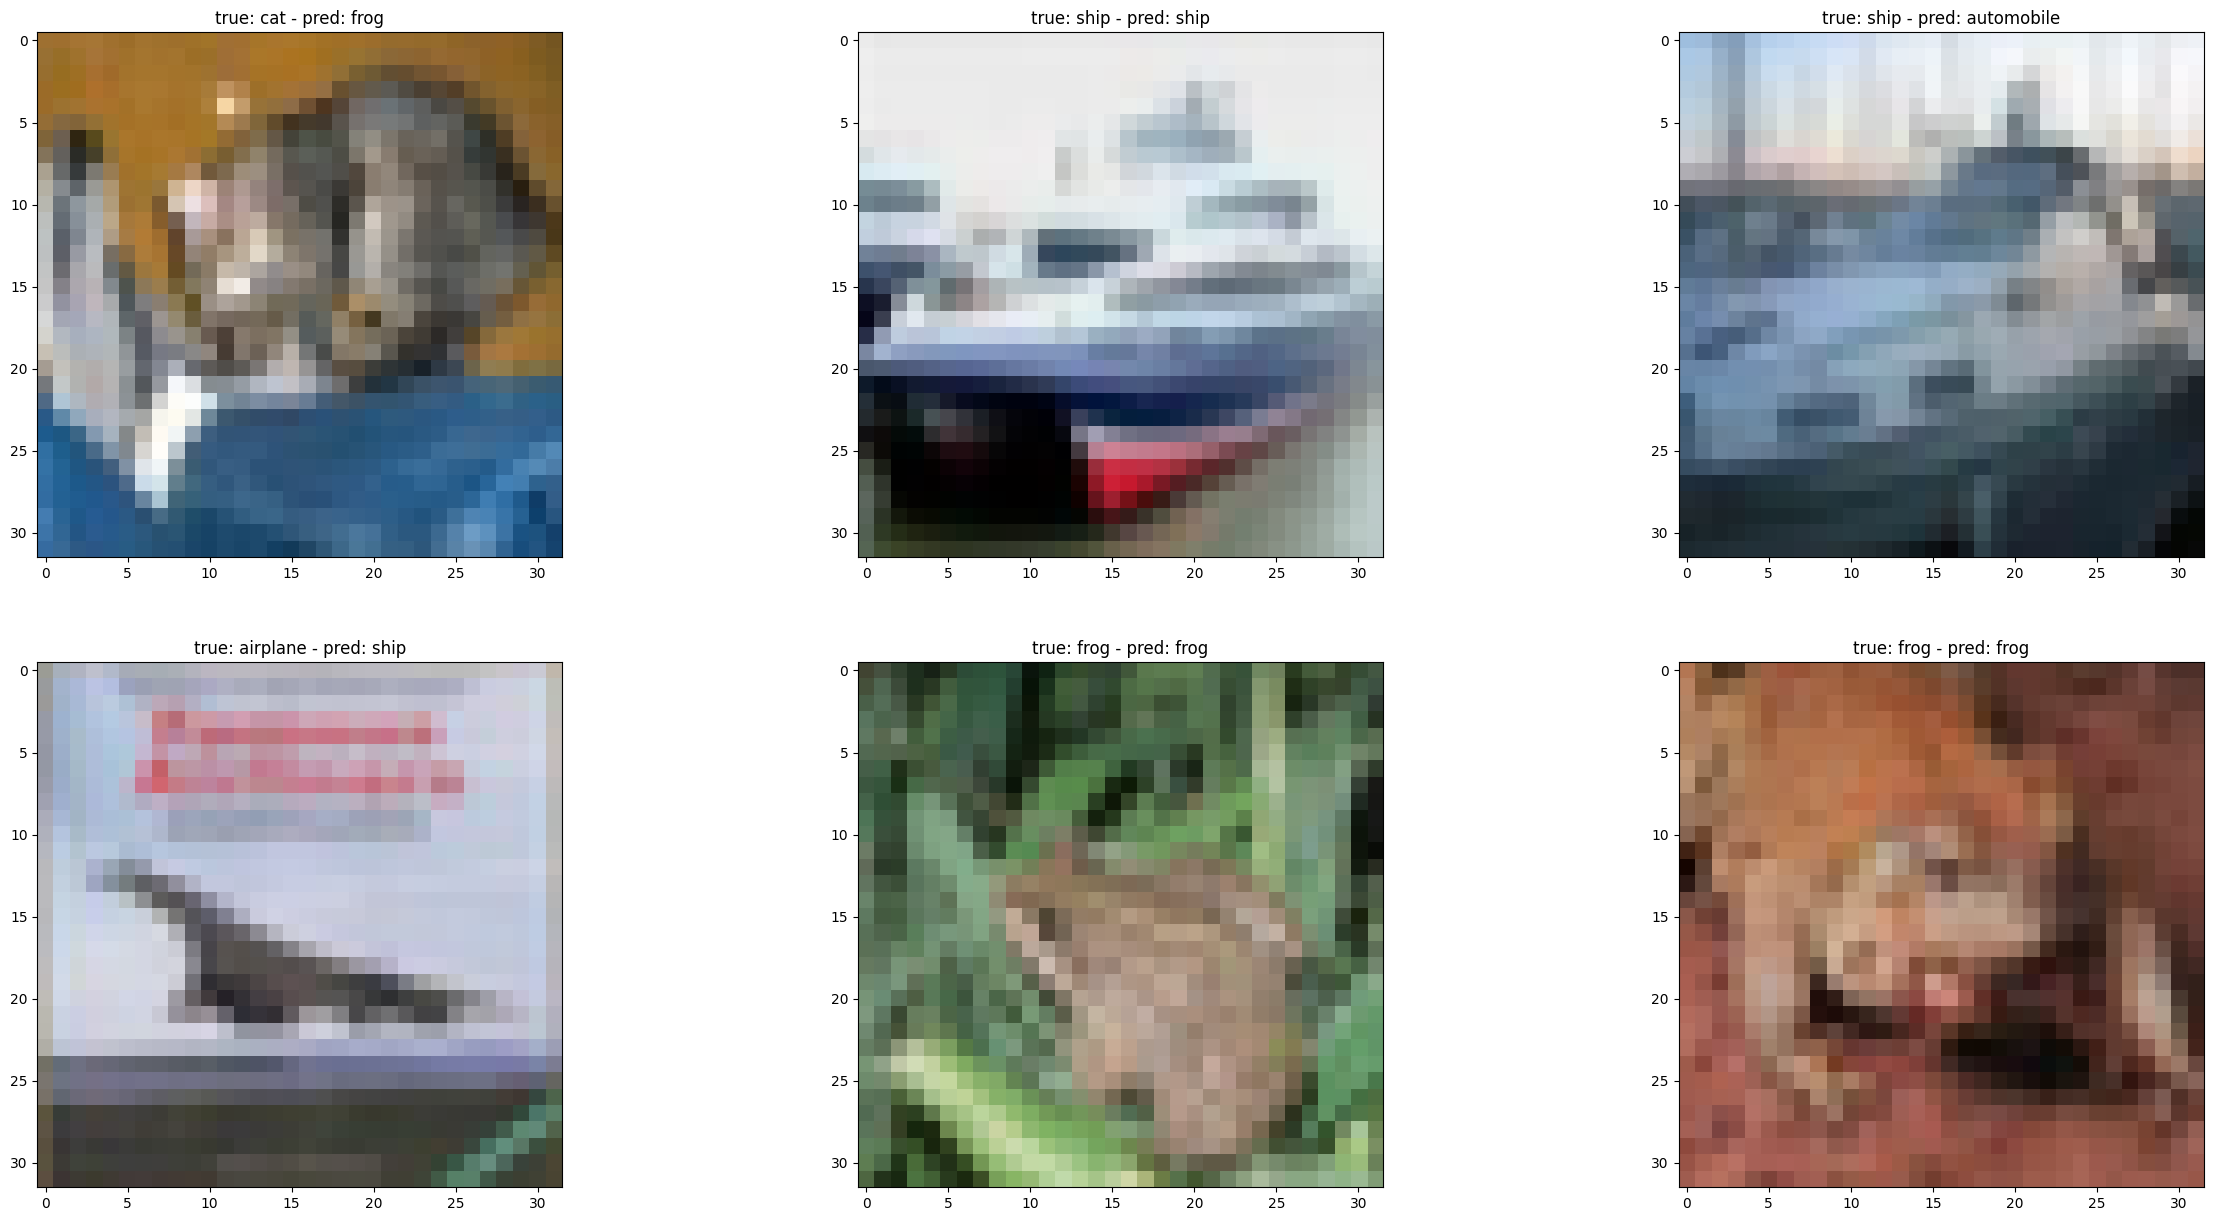

In [54]:
fig, ax = plt.subplots(2, 3, figsize=(30, 15))

ax[0, 0].imshow(x_test[0])
ax[0, 0].set_title(f'true: {num_to_cl.get(y_test[0, 0])} - pred: {num_to_cl.get(y_pred[0, 0])}')
ax[0, 1].imshow(x_test[1])
ax[0, 1].set_title(f'true: {num_to_cl.get(y_test[1, 0])} - pred: {num_to_cl.get(y_pred[1, 0])}')
ax[0, 2].imshow(x_test[2])
ax[0, 2].set_title(f'true: {num_to_cl.get(y_test[2, 0])} - pred: {num_to_cl.get(y_pred[2, 0])}')
ax[1, 0].imshow(x_test[3])
ax[1, 0].set_title(f'true: {num_to_cl.get(y_test[3, 0])} - pred: {num_to_cl.get(y_pred[3, 0])}')
ax[1, 1].imshow(x_test[4])
ax[1, 1].set_title(f'true: {num_to_cl.get(y_test[4, 0])} - pred: {num_to_cl.get(y_pred[4, 0])}')
ax[1, 2].imshow(x_test[5])
ax[1, 2].set_title(f'true: {num_to_cl.get(y_test[5, 0])} - pred: {num_to_cl.get(y_pred[5, 0])}')

## Задание 2. Классификация изображений полносвязной нейронной сетью

Используя прошлый набор данных обучить глубокую полносвязную нейросеть классифицировать изображения.

В качестве входных данных использовать:
- Пиксели
- Признаки из предыдущего задания

В качестве фреймворка для нейросетей можно использовать:
- Keras (достаточно просто)
- TensorFlow (сложновато)
- Pytorch (лучший выбор)
- FastAI (зачем вам это?)

Задачи (помним про стандартизацию данных):
1) Обучить модель
2) Отобразить процесс обучения
3) Отобразить качество модели на тестовой выборке
4) Отобразить предсказание некоторый тестовых изображений.

In [6]:
tf.random.set_seed(0)
np.random.seed(0)

#### Пиксели

In [130]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=((32, 32, 3))),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
history = model.fit(
    x_train/255,
    y_train,
    batch_size=256,
    epochs=20,
    validation_data=(x_val/255, y_val),
)

Epoch 1/20
14/14 [==============================] - 13s 868ms/step - loss: 2.6116 - accuracy: 0.1126 - val_loss: 2.2845 - val_accuracy: 0.1353
Epoch 2/20
14/14 [==============================] - 12s 860ms/step - loss: 2.2864 - accuracy: 0.1163 - val_loss: 2.2836 - val_accuracy: 0.1507
Epoch 3/20
14/14 [==============================] - 11s 802ms/step - loss: 2.2646 - accuracy: 0.1491 - val_loss: 2.2341 - val_accuracy: 0.1613
Epoch 4/20
14/14 [==============================] - 11s 784ms/step - loss: 2.2133 - accuracy: 0.1620 - val_loss: 2.1600 - val_accuracy: 0.1760
Epoch 5/20
14/14 [==============================] - 11s 791ms/step - loss: 2.1476 - accuracy: 0.1800 - val_loss: 2.0459 - val_accuracy: 0.2113
Epoch 6/20
14/14 [==============================] - 11s 784ms/step - loss: 2.0768 - accuracy: 0.2140 - val_loss: 1.9645 - val_accuracy: 0.2700
Epoch 7/20
14/14 [==============================] - 11s 787ms/step - loss: 2.0407 - accuracy: 0.2346 - val_loss: 1.9267 - val_accuracy: 0.2900

<Axes: >

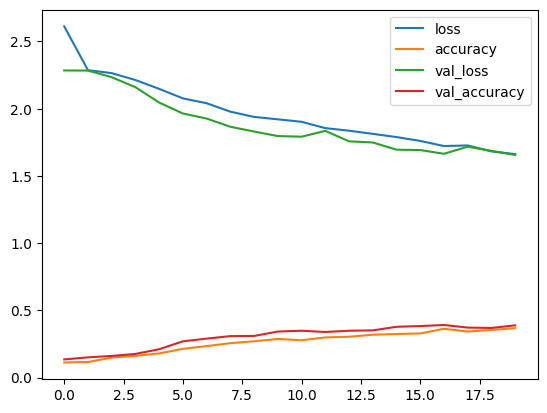

In [131]:
pd.DataFrame(history.history).plot()

In [132]:
y_pred = model.predict(x_test/255)
y_pred = [np.argmax(pred) for pred in y_pred]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 1s 18ms/step
[[46  2  1  4  2  2  3  8 26  9]
 [ 2 35  0  3  0  2  1  4 12 30]
 [23  4  2  4 23  2 21 11  7  3]
 [ 8  2  0 19  6  9 40 10  6  3]
 [10  1  3  8 26  2 25  6  4  5]
 [ 4  6  1 14  6 18 18 13  4  2]
 [ 2  1  0 11 11  2 81  3  1  0]
 [ 9  1  0  9  9  0 16 48  4  6]
 [14  5  0  1  1  3  0  1 74  7]
 [ 5 10  1  2  1  0  4  6 20 60]]
              precision    recall  f1-score   support

           0       0.37      0.45      0.41       103
           1       0.52      0.39      0.45        89
           2       0.25      0.02      0.04       100
           3       0.25      0.18      0.21       103
           4       0.31      0.29      0.30        90
           5       0.45      0.21      0.29        86
           6       0.39      0.72      0.50       112
           7       0.44      0.47      0.45       102
           8       0.47      0.70      0.56       106
           9       0.48      0.55      0.51       109

    accuracy       

#### HOG

In [146]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', input_shape=(None, 2916)),
    tf.keras.layers.Dropout(.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(.4),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.3),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
history = model.fit(
    HOG_train,
    y_train,
    batch_size=256,
    epochs=40,
    validation_data=(HOG_val, y_val),
)

Epoch 1/40


c:\Users\yolor\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


14/14 [==============================] - 1s 21ms/step - loss: 2.3001 - accuracy: 0.1109 - val_loss: 2.2563 - val_accuracy: 0.1840
Epoch 2/40
14/14 [==============================] - 0s 13ms/step - loss: 2.2165 - accuracy: 0.1620 - val_loss: 2.0851 - val_accuracy: 0.1967
Epoch 3/40
14/14 [==============================] - 0s 12ms/step - loss: 2.1040 - accuracy: 0.1889 - val_loss: 2.0263 - val_accuracy: 0.2180
Epoch 4/40
14/14 [==============================] - 0s 12ms/step - loss: 2.0479 - accuracy: 0.1943 - val_loss: 1.9821 - val_accuracy: 0.2227
Epoch 5/40
14/14 [==============================] - 0s 11ms/step - loss: 2.0046 - accuracy: 0.2020 - val_loss: 1.9633 - val_accuracy: 0.2433
Epoch 6/40
14/14 [==============================] - 0s 12ms/step - loss: 1.9393 - accuracy: 0.2457 - val_loss: 1.8937 - val_accuracy: 0.3180
Epoch 7/40
14/14 [==============================] - 0s 13ms/step - loss: 1.8769 - accuracy: 0.2877 - val_loss: 1.8138 - val_accuracy: 0.3567
Epoch 8/40
14/14 [======

<Axes: >

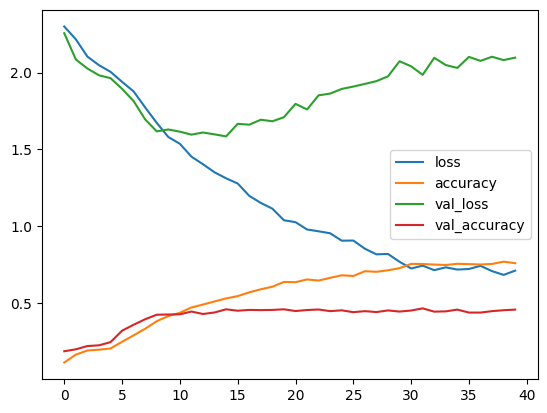

In [147]:
pd.DataFrame(history.history).plot()

In [148]:
y_pred = model.predict(HOG_test)
y_pred = [np.argmax(pred) for pred in y_pred]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[42  3  7  2 16  2  2  1 24  4]
 [ 1 60  0  0  4  0  7  0  8  9]
 [ 5  2 32  6 22 11  9  5  7  1]
 [ 2  3  5 24 21 14 19  7  3  5]
 [ 4  0  2 12 47  1  4 13  6  1]
 [ 0  0  7 13 15 20 13 11  1  6]
 [ 2  7  4 16 17  0 59  2  3  2]
 [ 2  1  2  4 18  7  3 55  2  8]
 [10 13  0  1  7  0  3  0 63  9]
 [ 4 12  0  3  9  2  4  4  9 62]]
              precision    recall  f1-score   support

           0       0.58      0.41      0.48       103
           1       0.59      0.67      0.63        89
           2       0.54      0.32      0.40       100
           3       0.30      0.23      0.26       103
           4       0.27      0.52      0.35        90
           5       0.35      0.23      0.28        86
           6       0.48      0.53      0.50       112
           7       0.56      0.54      0.55       102
           8       0.50      0.59      0.54       106
           9       0.58      0.57      0.57       109

    accuracy        

#### Bag of visual words

Text(0.5, 1.0, 'true: frog - pred: frog')

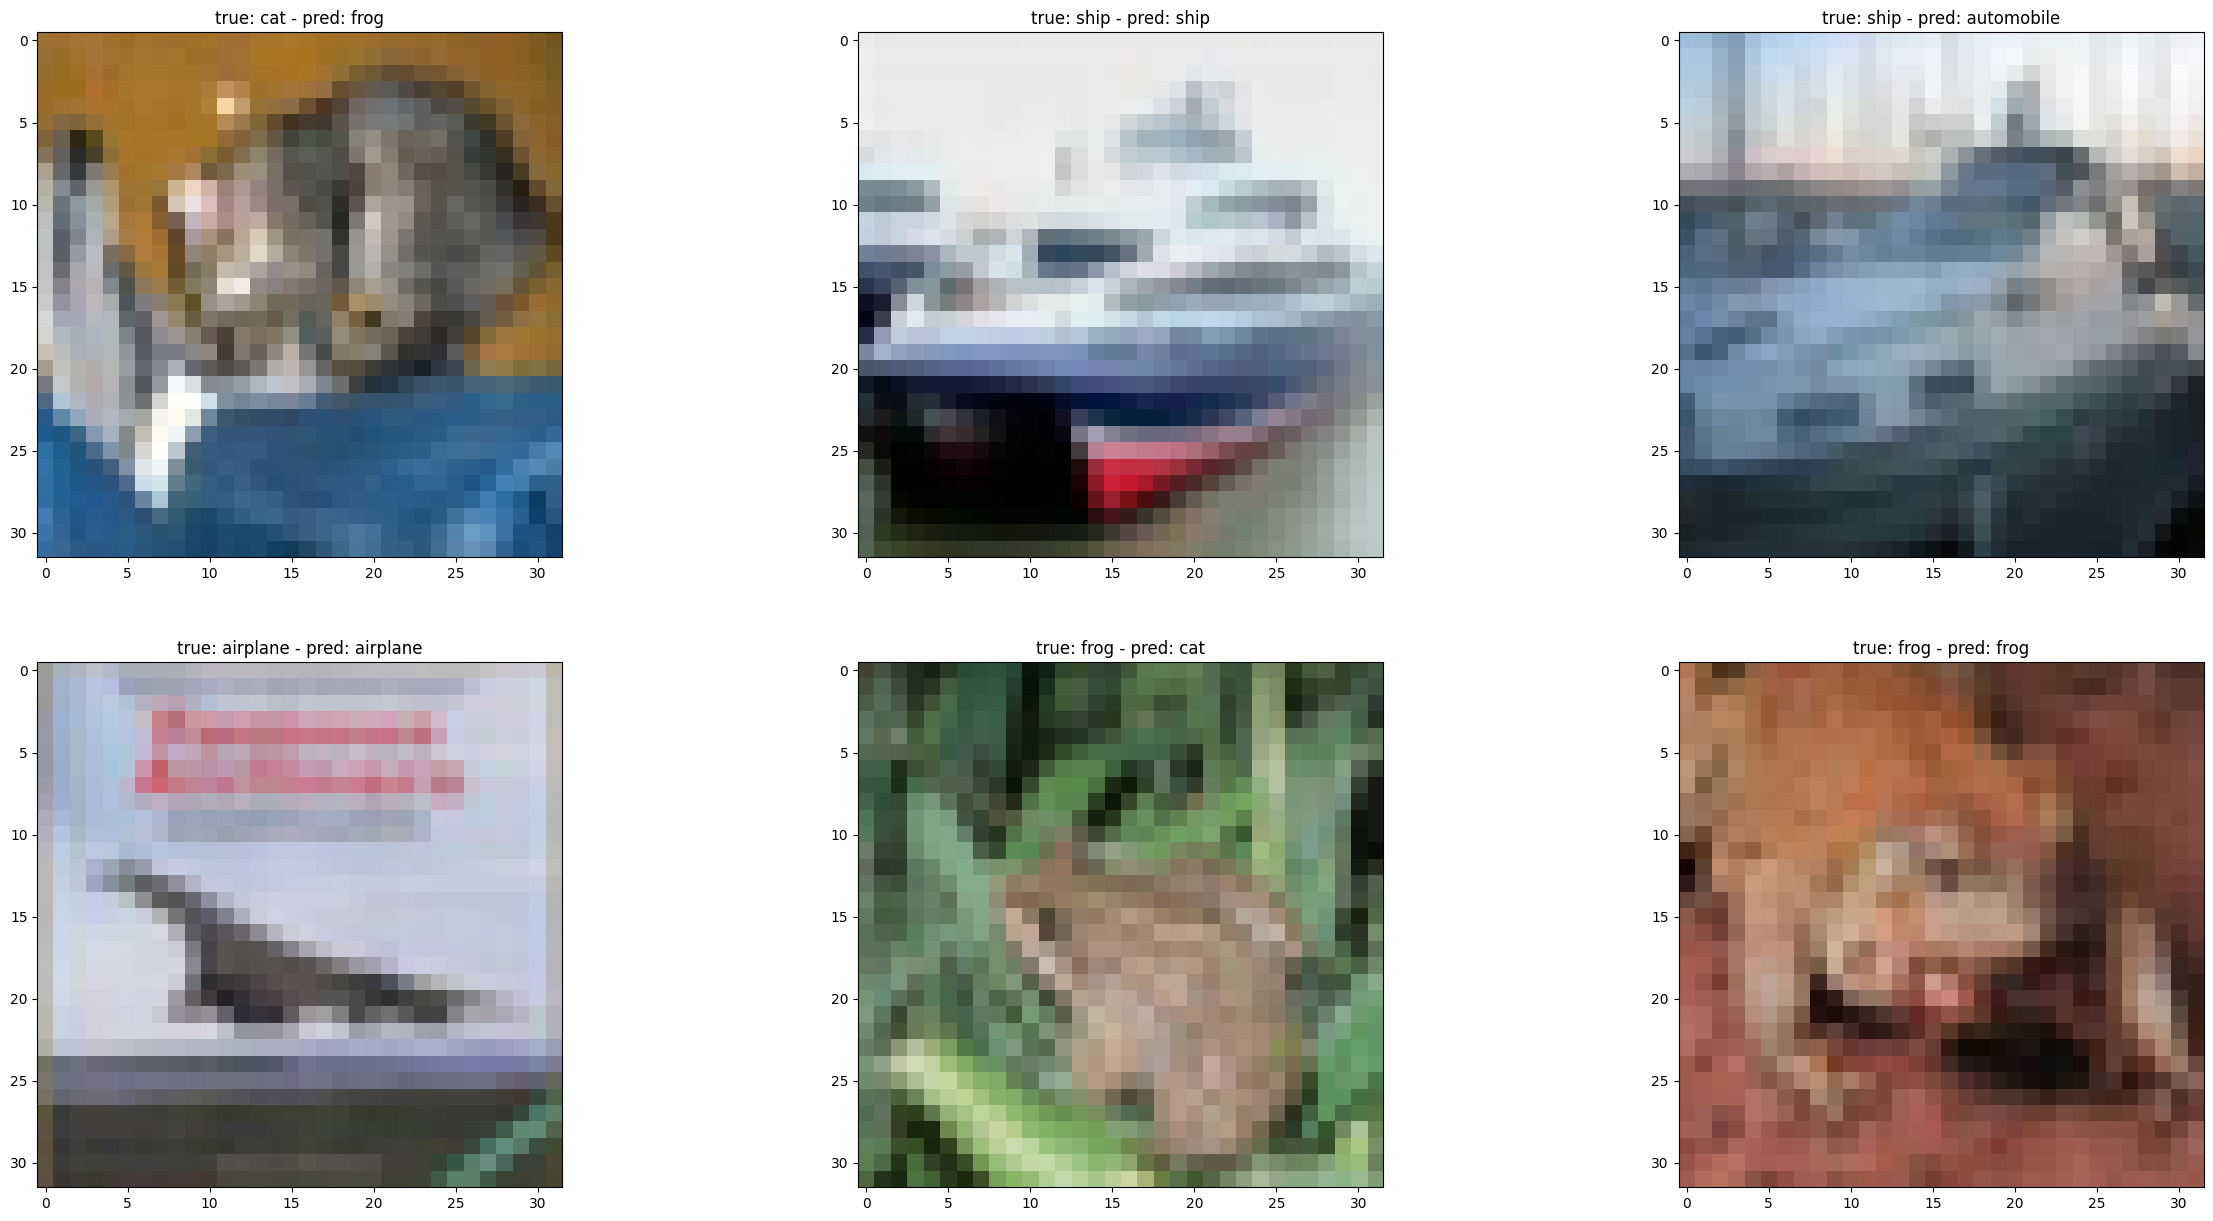

In [149]:
fig, ax = plt.subplots(2, 3, figsize=(30, 15))

ax[0, 0].imshow(x_test[0])
ax[0, 0].set_title(f'true: {num_to_cl.get(y_test[0, 0])} - pred: {num_to_cl.get(y_pred[0])}')
ax[0, 1].imshow(x_test[1])
ax[0, 1].set_title(f'true: {num_to_cl.get(y_test[1, 0])} - pred: {num_to_cl.get(y_pred[1])}')
ax[0, 2].imshow(x_test[2])
ax[0, 2].set_title(f'true: {num_to_cl.get(y_test[2, 0])} - pred: {num_to_cl.get(y_pred[2])}')
ax[1, 0].imshow(x_test[3])
ax[1, 0].set_title(f'true: {num_to_cl.get(y_test[3, 0])} - pred: {num_to_cl.get(y_pred[3])}')
ax[1, 1].imshow(x_test[4])
ax[1, 1].set_title(f'true: {num_to_cl.get(y_test[4, 0])} - pred: {num_to_cl.get(y_pred[4])}')
ax[1, 2].imshow(x_test[5])
ax[1, 2].set_title(f'true: {num_to_cl.get(y_test[5, 0])} - pred: {num_to_cl.get(y_pred[5])}')

## Задание 3. Классификация изображений сверточной нейросетью

Используя прошлый набор данных обучить глубокую cверточную нейросеть (не глубже 5 слоев) и классифицировать изображения.

Задачи (помним про стандартизацию данных):
1) Обучить модель
2) Отобразить процесс обучения
3) Отобразить качество модели на тестовой выборке
4) Отобразить предсказание некоторый тестовых изображений.

In [125]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(.3),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(.4),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
history = model.fit(
    x_train,
    y_train,
    batch_size=256,
    epochs=50,
    validation_data=(x_val, y_val),
)

Epoch 1/50


c:\Users\yolor\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


14/14 [==============================] - 9s 485ms/step - loss: 2.9066 - accuracy: 0.1620 - val_loss: 2.6400 - val_accuracy: 0.0920
Epoch 2/50
14/14 [==============================] - 7s 472ms/step - loss: 2.4506 - accuracy: 0.2303 - val_loss: 2.6279 - val_accuracy: 0.1067
Epoch 3/50
14/14 [==============================] - 7s 468ms/step - loss: 2.2099 - accuracy: 0.2794 - val_loss: 2.8841 - val_accuracy: 0.1207
Epoch 4/50
14/14 [==============================] - 7s 464ms/step - loss: 2.0613 - accuracy: 0.2974 - val_loss: 2.4559 - val_accuracy: 0.1580
Epoch 5/50
14/14 [==============================] - 7s 489ms/step - loss: 1.9508 - accuracy: 0.3300 - val_loss: 2.1866 - val_accuracy: 0.2160
Epoch 6/50
14/14 [==============================] - 7s 484ms/step - loss: 1.8549 - accuracy: 0.3563 - val_loss: 2.0616 - val_accuracy: 0.2620
Epoch 7/50
14/14 [==============================] - 7s 487ms/step - loss: 1.7673 - accuracy: 0.3791 - val_loss: 1.9044 - val_accuracy: 0.3293
Epoch 8/50
14/14 

<Axes: >

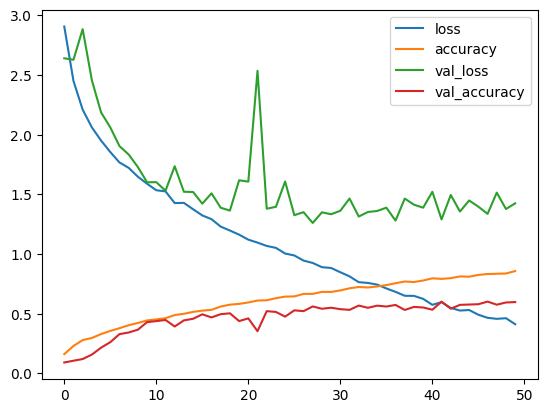

In [126]:
pd.DataFrame(history.history).plot()

In [127]:
y_pred = model.predict(x_test)
y_pred = [np.argmax(pred) for pred in y_pred]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 1s 16ms/step
[[56  7  6  2  6  0  2  1 19  4]
 [ 3 74  0  0  0  0  1  1  4  6]
 [11  2 52 14  9  7  3  0  1  1]
 [ 5  2 11 41 11  8 13  6  2  4]
 [ 4  1 13  4 44  6  6  8  4  0]
 [ 0  2 12 30  4 26  2  9  1  0]
 [ 0  2 14  9  7  2 75  1  1  1]
 [ 3  0  6  4 13  6  0 67  3  0]
 [ 8  7  1  2  0  0  1  0 83  4]
 [ 1 17  2  1  0  0  2  1 10 75]]
              precision    recall  f1-score   support

           0       0.62      0.54      0.58       103
           1       0.65      0.83      0.73        89
           2       0.44      0.52      0.48       100
           3       0.38      0.40      0.39       103
           4       0.47      0.49      0.48        90
           5       0.47      0.30      0.37        86
           6       0.71      0.67      0.69       112
           7       0.71      0.66      0.68       102
           8       0.65      0.78      0.71       106
           9       0.79      0.69      0.74       109

    accuracy       

Text(0.5, 1.0, 'true: frog - pred: cat')

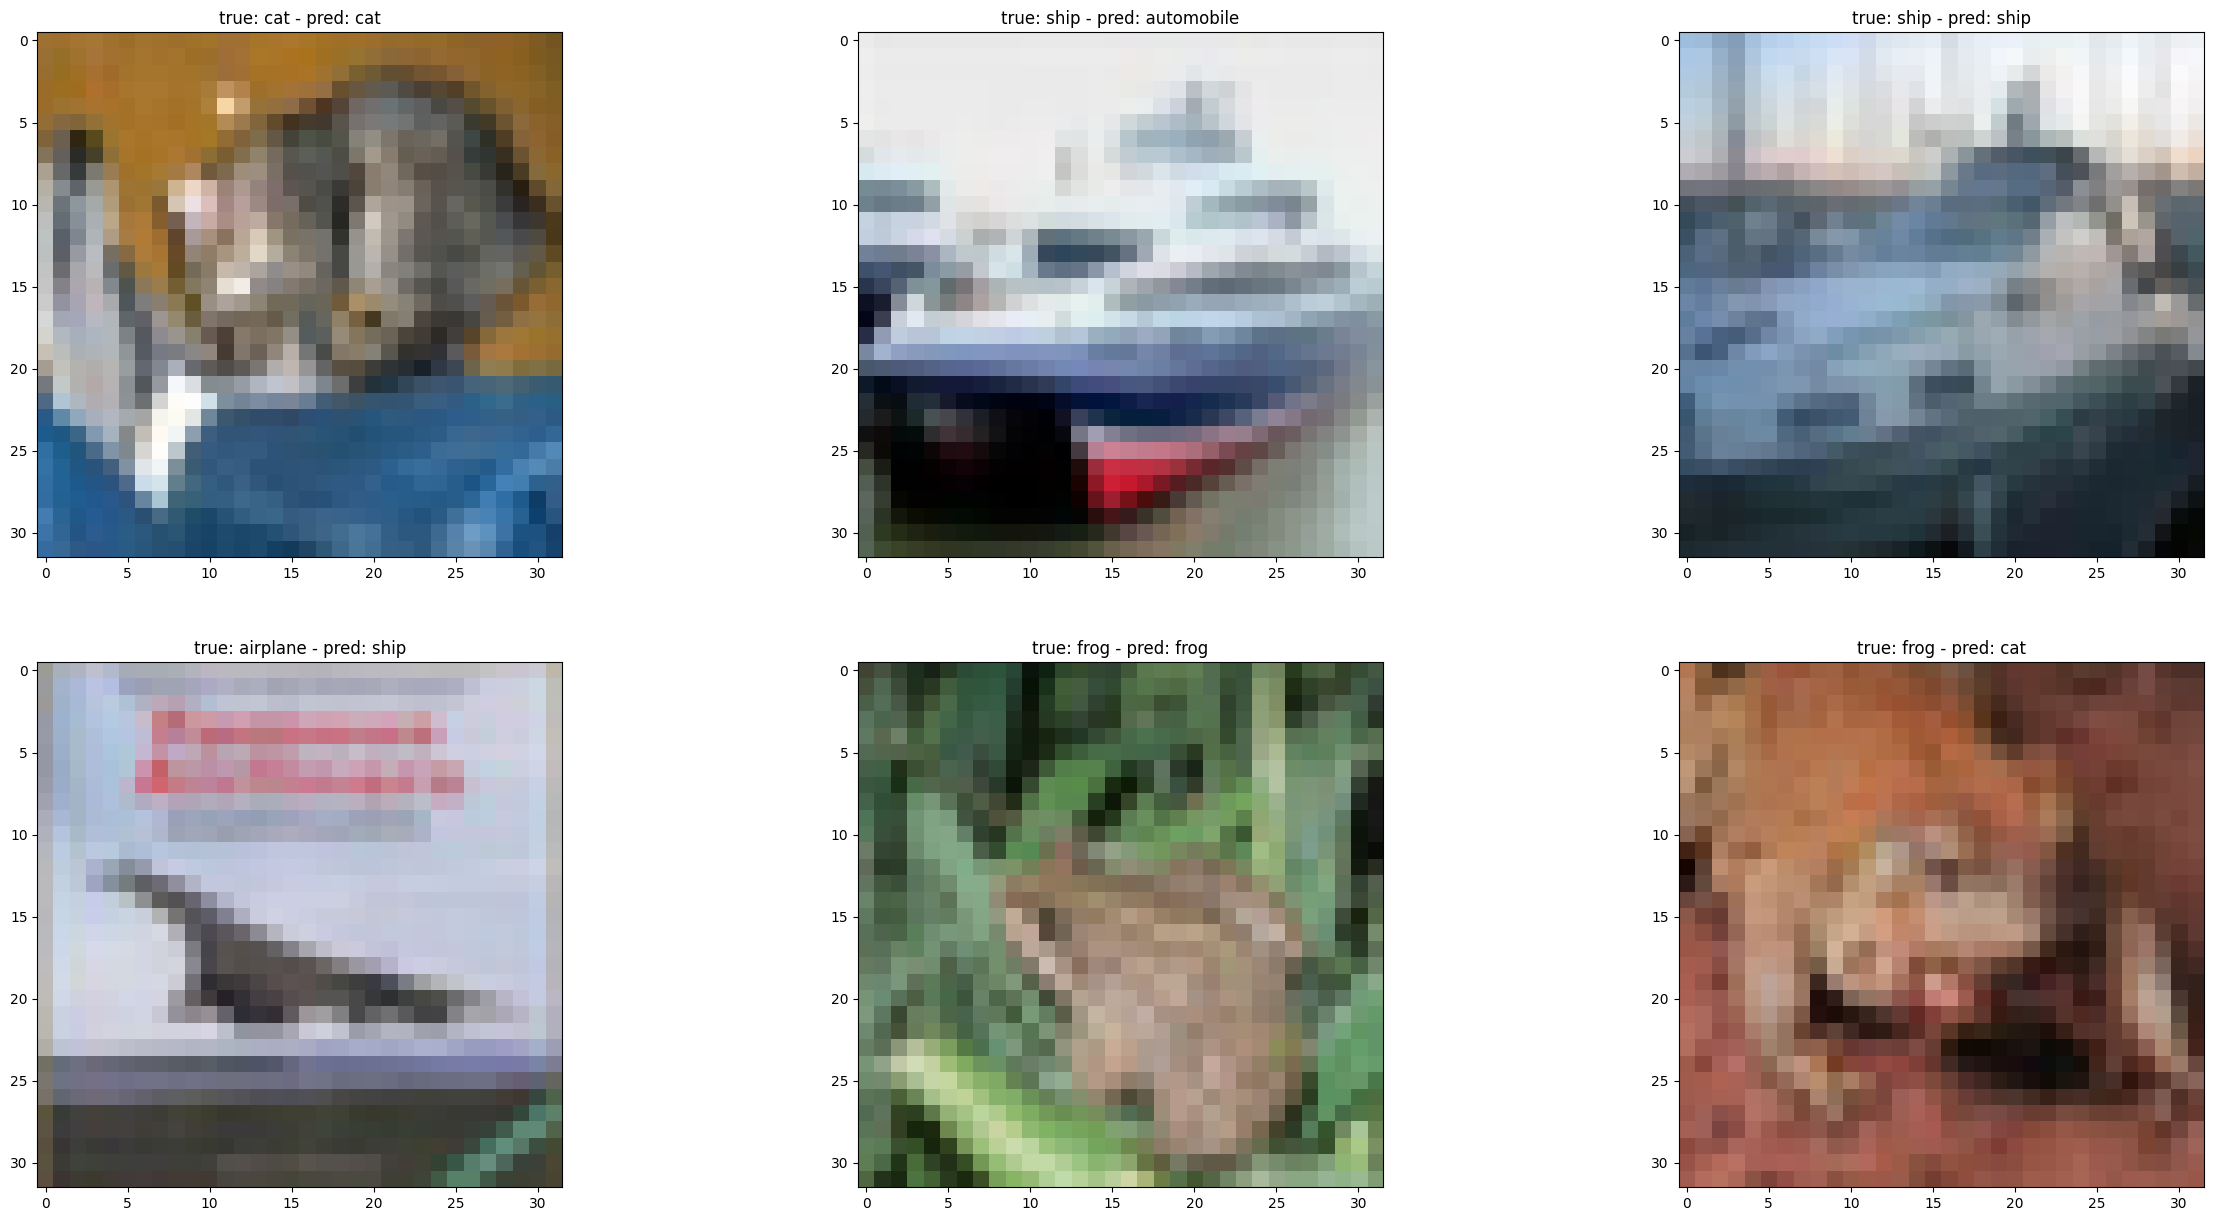

In [128]:
fig, ax = plt.subplots(2, 3, figsize=(30, 15))

ax[0, 0].imshow(x_test[0])
ax[0, 0].set_title(f'true: {num_to_cl.get(y_test[0, 0])} - pred: {num_to_cl.get(y_pred[0])}')
ax[0, 1].imshow(x_test[1])
ax[0, 1].set_title(f'true: {num_to_cl.get(y_test[1, 0])} - pred: {num_to_cl.get(y_pred[1])}')
ax[0, 2].imshow(x_test[2])
ax[0, 2].set_title(f'true: {num_to_cl.get(y_test[2, 0])} - pred: {num_to_cl.get(y_pred[2])}')
ax[1, 0].imshow(x_test[3])
ax[1, 0].set_title(f'true: {num_to_cl.get(y_test[3, 0])} - pred: {num_to_cl.get(y_pred[3])}')
ax[1, 1].imshow(x_test[4])
ax[1, 1].set_title(f'true: {num_to_cl.get(y_test[4, 0])} - pred: {num_to_cl.get(y_pred[4])}')
ax[1, 2].imshow(x_test[5])
ax[1, 2].set_title(f'true: {num_to_cl.get(y_test[5, 0])} - pred: {num_to_cl.get(y_pred[5])}')